In [1]:
import numpy as np
import yfinance as yf
from classes.dataframe.EnhancedDataframe import EnhancedDataframe
from classes.database.SP500Database import SP500Database
from config import db_path

In [2]:
# df = EnhancedDataframe.populate_dataframe(df, "AAPL")


def compute_volatility(df):
    df.index = df['Date']
    dataframe = df.copy().loc["2021-11-01 00:00:00":"2021-11-30 00:00:00"]
    mean_close = dataframe['Close'].mean()
    dataframe['Volatility'] = np.vectorize(lambda x: x - mean_close)(dataframe['Close'])
    dataframe['Volatility'] = dataframe['Volatility'] ** 2
    sum_std = dataframe['Volatility'].sum()
    volatility = sum_std / len(dataframe)
    volatility = np.sqrt(volatility)
    pct_vol = volatility / dataframe['Close'].mean() * 100
    return pct_vol

In [87]:
vol = compute_volatility(df)

In [89]:
vol, df['Change'].iloc[-1], df['MA20'].iloc[-1], df['RSI'].iloc[-1], df['BB_lower'].iloc[-1], df['Close'].iloc[-1]

(4.403518190358524,
 3.1916408036466892,
 158.2849998474121,
 37.8789972687746,
 145.11533337382826,
 147.11000061035156)

In [90]:
# def get_volatility_entry(vol, change, ma20, rsi, bb_lower, close):
#     if (rsi < 35) and (close < bb_lower)

,Open,High,Low,Close,Adj_Close,Volume,Ticker,MA20,MA50,MA100,...,BB_middle,BB_upper,STOCH_K,STOCH_D,Volume_Change,Change,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-05,113.910004,116.650002,113.550003,116.500000,115.270355,106243800,AAPL,112.825999,114.255749,100.994650,...,112.944333,119.010794,91.655260,80.583530,-0.265826,3.079104,111.360001,120.539997,115.169376,107.482502
2020-10-06,115.699997,116.120003,112.250000,113.160004,111.965607,161498200,AAPL,112.842999,114.622749,101.352400,...,112.895000,118.915191,68.809872,74.509772,0.520072,-2.866950,111.360001,120.539997,115.180626,107.536251
2020-10-07,114.620003,115.550003,114.129997,115.080002,113.865334,96849000,AAPL,112.730999,115.059299,101.733925,...,112.779000,118.543824,81.942552,80.802561,-0.400309,1.696711,112.695000,120.539997,117.714375,108.643749
2020-10-08,116.250000,116.400002,114.589996,114.970001,113.756500,83477200,AAPL,112.805000,115.457899,102.096225,...,112.770167,118.518825,81.190154,77.314193,-0.138069,-0.095586,114.970001,120.539997,119.645000,110.543751
2020-10-09,115.279999,117.000000,114.919998,116.970001,115.735382,100506900,AAPL,113.053500,115.873499,102.483075,...,112.964500,118.910701,94.103774,85.745493,0.204004,1.739584,114.970001,115.969997,122.230623,112.883747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,154.929993,155.830002,151.490005,152.059998,152.059998,131577900,AAPL,162.206000,165.065000,168.242600,...,162.499500,171.764744,2.844273,14.657468,0.133748,-3.318922,158.985001,164.990005,168.082500,164.855003
2022-05-10,155.520004,156.740005,152.929993,154.509995,154.509995,115366700,AAPL,161.643999,164.852800,167.994700,...,161.897834,171.533691,15.069811,13.291543,-0.123206,1.611204,158.985001,164.990005,168.557503,164.855003
2022-05-11,153.500000,155.449997,145.809998,146.500000,146.500000,142689800,AAPL,160.585999,164.518800,167.737100,...,160.957667,171.620900,3.127845,7.013976,0.236837,-5.184127,156.144997,162.055000,169.242500,164.855003


In [26]:
sp500_db = SP500Database()
sp500_db.connect_existing_database(db_path / "sp500.sqlite")

tickers = sp500_db.tickers

vols = []
for ticker in tickers:
    df = sp500_db.query_ticker_data(ticker)
    vols.append(compute_volatility(df))

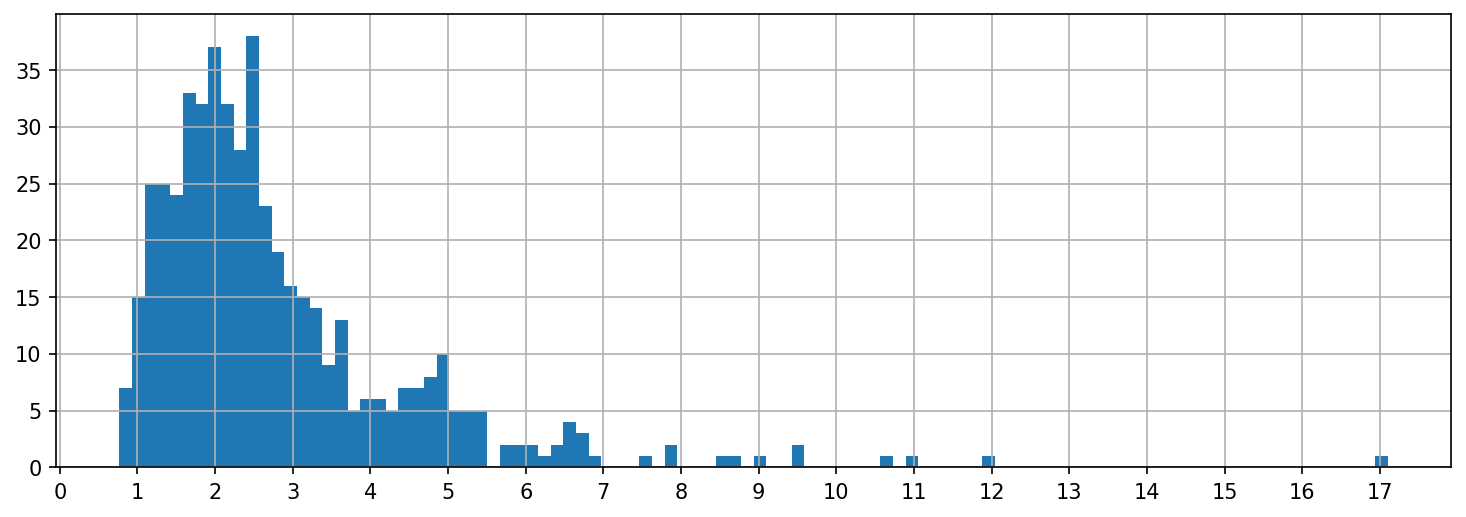

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4), dpi=150)
plt.xticks(range(0, 26))
plt.hist(vols, bins=100);
plt.grid()

In [28]:
np.array(vols).mean()

2.815302638255071

In [16]:
df

,test,Date,Ticker,Open,High,Low,Close,Adj_Close,Volume,MA20,...,BB_middle,BB_upper,STOCH_K,STOCH_D,Volume_Change,Change,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b
0,77808,2021-10-01 00:00:00,ZTS,194.139999,197.699997,192.429993,196.190002,195.299835,2095500,201.996502,...,202.179167,211.674630,32.036923,22.891130,0.173555,1.055941,198.654999,200.715004,203.079998,194.875000
1,77809,2021-10-04 00:00:00,ZTS,195.179993,195.990005,190.929993,193.690002,192.811172,1942300,201.196502,...,201.407000,211.074841,18.338932,22.095834,-0.073109,-1.274275,198.454994,200.514999,203.439999,195.959999
2,77810,2021-10-05 00:00:00,ZTS,195.220001,197.500000,193.660004,196.460007,195.568619,2490200,200.629002,...,200.815000,210.314243,36.744272,29.040042,0.282088,1.430122,198.454994,200.514999,203.852497,195.959999
3,77811,2021-10-06 00:00:00,ZTS,195.669998,196.070007,193.449997,195.779999,194.891693,1564600,199.951502,...,200.149334,209.284347,32.225948,29.103050,-0.371697,-0.346130,198.254997,200.514999,203.852497,196.110001
4,77812,2021-10-07 00:00:00,ZTS,196.949997,201.440002,196.949997,199.009995,198.107025,1093400,199.601002,...,199.741334,208.272554,53.687709,40.885976,-0.301163,1.649809,197.469994,200.514999,203.852497,196.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,77958,2022-05-06 00:00:00,ZTS,169.669998,171.339996,167.520004,169.210007,169.210007,3339500,182.107500,...,182.405333,197.317333,7.259461,20.416890,0.169620,-1.306498,174.870003,184.420006,190.880005,194.279999
151,77959,2022-05-09 00:00:00,ZTS,167.000000,168.399994,161.100006,161.809998,161.809998,2984600,180.193501,...,180.610500,195.420849,2.390544,8.260523,-0.106273,-4.373269,171.660004,181.210007,190.880005,193.705002
152,77960,2022-05-10 00:00:00,ZTS,163.990005,164.750000,159.080002,162.649994,162.649994,2851900,178.701000,...,178.978667,194.358187,11.899974,7.183326,-0.044462,0.519125,170.650002,180.200005,190.655003,193.705002
153,77961,2022-05-11 00:00:00,ZTS,161.869995,164.110001,159.259995,159.899994,159.899994,3355200,177.300500,...,177.560333,194.008014,3.120213,5.803577,0.176479,-1.690747,170.470001,180.200005,190.497501,193.705002
